# Contenido del proyecto <a id='back'></a>

* [Introducción](#intro)
* [Información general de los datos](#info)
* [Preparación de los datos](#preprocessing)
* [Tratamiento de datos ausentes](#ausentes)
* [Conversión de tipos de datos](#conversion)
* [Análisis de datos](#analysis)
* [Prueba de hipótesis](#hypotesis)
* [Conclusiones](#end)

# Introducción <a id='intro'></a>
La base de datos contiene información de una tienda de video juegos denominada online Ice, que ofrece sus productos por todo el mundo. Se cuenta con fuentes abiertas que proporcionan información relevante de éstos video juegos como: reseñas de usuarios y expertos, géneros, plataformas y datos históricos sobre las ventas.

En el presente proyecto, se desea identificar de acuerdo a la información proporcionada los patrones que determinan el éxito o no en las ventas de video juegos, para lo cual inicialmente se identificarán los datos ausentes y posibles problemas en los tipos de datos, y finalmente por medio de gráficos y análisis estadísticos se van a identificar los patrones en las ventas de los video juegos según platafroma, calificación por parte de los usuarios, género y demás patrones. La información necesaria se complementará con fuentes de datos externas que contengan también información de ventas de video juegos.


# Información general de los datos. <a id='info'></a>

Importamos las librerías que podrían ser útiles durante el análisis de los datos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy import stats as st
import numpy as np
from scipy.stats import ttest_ind

Cargamos el archivo que contiene los datos.

Importamos además una base de datos externa con la cual complementemos la base de datos que tenemos. La base de datos externa se obtiene de la plataforma "Kaggel", en la cual filtramos bases de datos que contengan información de ventas de video juegos. la base de datos se carga en google drive y se obtiene el link de ésta información.

In [2]:
games=pd.read_csv('/datasets/games.csv')

In [3]:
url='https://drive.google.com/file/d/1JCE-Ry_8pN_tupwuqxlPqfRfs281dgiH/view?usp=share_link'

In [4]:
url='https://drive.google.com/uc?id='+url.split('/')[-2]

In [5]:
games2=pd.read_csv(url)

La segunda fuente de información se obtiene de un dataset disponible en la plataforma "Kaggel", en la cual filtramos bases de datos que contengan información de ventas de video juegos. la base de datos se carga en google drive y se obtiene el link de ésta información.

Link de descarga en "kaggel": https://www.kaggle.com/datasets/gregorut/videogamesales

Analizamos la información general de los datos.

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Se identifican valores ausentes en las columnas Name, Genre, Year_of_Release,Critic_Score,User_Score y Rating.

Para facilitar la manipulación de los datos, se requiere reemplazar las letras de los nombres de las columnas por minúsculas.

El tipo de dato en las columnas Year_of_Release se considera que debe modificarse a tipo entero. El tipo de dato en la columna "user_score", se considera que debe cambiarse de tipo object a tipo float. 

Revisamos la información de los datos del otro Dataframe (games2).

In [8]:
games2.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Preparación de los datos. <a id='preprocessing'></a>

Se reemplazan los nombres de las columnas para facilitar la minupalación de los datos. Para renombrar los nombres de las columnas con letras minúsculas, utilizamos la función str.lower()

In [9]:
games.columns=games.columns.str.lower() #los nombres de las columnas del Dataframe games se convierten a minúsculas.

In [10]:
games2.columns=games2.columns.str.lower()  #los nombres de las columnas del Dataframe games2 se convierten a minúsculas.

Comprobamos nuevamente el nombre de las columnas para verificar los cambios.

In [11]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [12]:
games2.columns

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

Cambiamos el nombre de la columna "year", del Dataframe games2 para facilitar la unión entre los Dataframes.

In [13]:
games2=games2.rename(columns={
    "year":"year_of_release"
})

In [14]:
games2.columns

Index(['rank', 'name', 'platform', 'year_of_release', 'genre', 'publisher',
       'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

# Tratamiento de datos ausentes. <a id='ausentes'></a>

In [15]:
ausentes=((games.isna().sum()/len(games))*100).sort_values(ascending=False)
ausentes

critic_score       51.319174
rating             40.478612
user_score         40.089740
year_of_release     1.609333
name                0.011965
genre               0.011965
platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
dtype: float64

Las columnas en las que se encuentran mas datos ausentes son en las columnas "critic_score"(51%), "rating"(40%) y "user_score" (40%). En la columna "year_of_release" se encuentra un 1% de datos ausentes y en las columnas "name" y "genre" sólo 0.012% de datos ausentes.

Filtramos las filas en las que las columnas contienen datos ausentes, con el objetivo de identificar patrones en los datos.

**Columna "critic_score"**

In [16]:
games[games["critic_score"].isnull()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


En los datos faltantes en la columna "critic_score", podríamos relacionar la ausencia de los datos con la antiguedad del video juego, la plataforma utilizada y posiblemente pocas reseñas del video juego. 

Para visualizar mejor ésta información y evidenciar las distribuciones de las plataformas y los años de lanzamiento, se crean histogramas en las columnas "platform" y "year_of_release".

**Histograma para las "plataformas"**

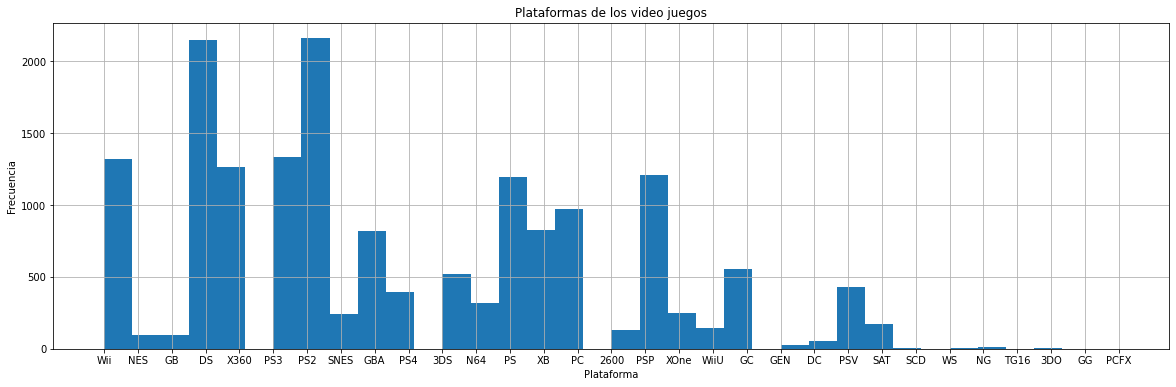

In [17]:
games["platform"].hist(bins=36,figsize=(20,6))
plt.title("Plataformas de los video juegos")
plt.xlabel("Plataforma")
plt.ylabel("Frecuencia")
plt.show()

Al visualizar la distribución de las plataformas de los video juegos, evidenciamos que la plataforma mas utilizada es "PS2". Entre las plataformas menos utilizadas se encuentran las plataformas "NES", "GB" y "SNES"; por lo cual es complicado relacionar los datos ausentes de "critic_score" con ésta variable, teniendo en cuenta el gran porcenjate de datos ausentes presentados en la columna "critic_score" y las pocas ventas en las plataformas donde podemos evidenciar que la variable "critic_score" se encuentra ausente.

**Histograma para los años de lanzamiento "year_of_release".**

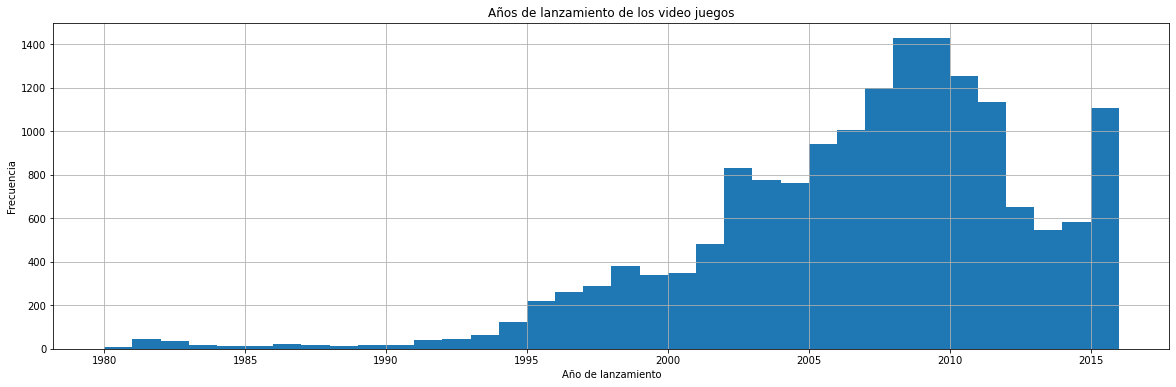

In [18]:
games["year_of_release"].hist(bins=36,figsize=(20,6))
plt.title("Años de lanzamiento de los video juegos")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Frecuencia")
plt.show()

De acuerdo con el histograma que nos relaciona los años de lanzamiento de los video juegos, evidenciamos que la mayoría de los video juegos son lanzados entre los años 2009-2010; por lo cual por el momento no podemos relacionar los datos ausentes de la varible "critic_score" con los años de lanzamiento.

Los datos ausentes de la variable "critic_score" por el momento se dejarán así y se analizarán al momento de filtrar los años, teniendo en cuenta que para éste caso sólo nos interesan los video juegos mas actuales.

**Columna "rating"**

In [19]:
games[games["rating"].isnull()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Para rellenar los datos ausentes de la columna "rating", podemos establecer la categorización de "unknown", debido a la complejidad de saber con exactitud la clasificación del juego.

In [20]:
games["rating"]=games["rating"].fillna("unknown")

In [21]:
games["rating"].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

**Columna "user_score"**

In [22]:
games[games["user_score"].isnull()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,unknown
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,unknown
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,unknown
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,unknown
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,unknown


Los datos ausentes de la columna "user_score" por el momento se dejarán así, teniendo en cuenta que generalmente éstos datos ausentes se reportan en video juegos mas antiguos, y posteriormente la columna de años deberá filtrarse para contar sólamente con los datos mas relevantes.

Analizamos las filas en las que user_score tiene como dato tbd, para identificar posibles patrones en éstos datos.

In [23]:
games.query('user_score=="tbd"').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


Las filas en las que user_score es igual a "tbd", se reeemplazan por NaN (not a number), ya que éste valor se asocia con los juegos que no tienen user_score.

**Reemplazamos el valor "tbd" de la columna "user_score"**, para facilitar la manipulación y análisis de los datos.

In [24]:
games["user_score"]=games["user_score"].replace("tbd",np.nan)

**Columna "year_of_release"**

In [25]:
games[games["year_of_release"].isnull()].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,unknown
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,unknown
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Unimos la información de los dos dataframes para completar la información de "year_of_release".

Inicialmente, del Dataframe original filtramos sólamente las columnas "name" y "platform".

In [26]:
games_platform_name=games.iloc[:,:2]
games_platform_name

,name,platform
0,Wii Sports,Wii
1,Super Mario Bros.,NES
2,Mario Kart Wii,Wii
3,Wii Sports Resort,Wii
4,Pokemon Red/Pokemon Blue,GB
...,...,...
16710,Samurai Warriors: Sanada Maru,PS3
16711,LMA Manager 2007,X360
16712,Haitaka no Psychedelica,PSV
16713,Spirits & Spells,GBA


Del Dataframe externo, filtramos solamente las columnas "name","platform" y "year_of_release", para realizar la unión de los Dataframe con la herramienta merge.

In [27]:
games_years=games2.iloc[:,1:4]
games_years

,name,platform,year_of_release
0,Wii Sports,Wii,2006
1,Super Mario Bros.,NES,1985
2,Mario Kart Wii,Wii,2008
3,Wii Sports Resort,Wii,2009
4,Pokemon Red/Pokemon Blue,GB,1996
...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002
16594,Men in Black II: Alien Escape,GC,2003
16595,SCORE International Baja 1000: The Official Game,PS2,2008
16596,Know How 2,DS,2010


Realizamos la unión de los dataframe, conservando la información de las columnas del Dataframe izquierdo.

In [28]:
games_union=games_platform_name.merge(games_years,on=["name","platform"],how="left")
games_union

,name,platform,year_of_release
0,Wii Sports,Wii,2006
1,Super Mario Bros.,NES,1985
2,Mario Kart Wii,Wii,2008
3,Wii Sports Resort,Wii,2009
4,Pokemon Red/Pokemon Blue,GB,1996
...,...,...,...
16719,Samurai Warriors: Sanada Maru,PS3,NaN
16720,LMA Manager 2007,X360,2006
16721,Haitaka no Psychedelica,PSV,NaN
16722,Spirits & Spells,GBA,2003


Finalmente, los datos ausentes de la columna "year_of_release" del Dataframe original (games), se rellena con la información de la columna "year_of_release" del merge generado.

In [29]:
games["year_of_release"]=games["year_of_release"].fillna(games_union["year_of_release"])

Revisamos nuevamente los datos ausentes de la columna "year_of_release".

In [30]:
games["year_of_release"].isnull().sum()

8

Identificamos que se conservan 8 filas en las que se presentan datos ausentes para la columna "year_of_release". Se deciden eliminar éstas filas, teniendo en cuenta la poca representación de ésta cantidad en los datos ausentes.

In [31]:
games=games.dropna(subset=["year_of_release"])

**Columna "name"**

In [32]:
games[games["name"].isnull()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown


In [33]:
games[games["genre"].isnull()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown


Para los datos faltantes de la columna "name" y "genre", podríamos simplemente eliminar éstas filas, teniendo en cuenta el bajo porcentajes que representan éstos datos.

Tratamos los datos ausentes de la columna **"name".**

Las filas donde la columna "name" reporta datos ausentes se elimina, teniendo en cuenta el poco porcentaje que representa en la base de datos.

In [34]:
games=games.dropna(subset=["name"])

In [35]:
games["name"].isna().sum()

0

Tratamos los datos ausentes de la columna **genre.**

Las filas donde la columna "genre" reporta datos ausentes se elimina, teniendo en cuenta el poco porcentaje que representa en la base de datos.

In [36]:
games=games.dropna(subset=["genre"])

In [37]:
games["genre"].isna().sum()

0

Se revisa nuevamente el Dataframe, en el cual sólo se deben conservar valores ausentes en las columnas critic_score y user_score, ya que los datos ausentes en éstas columnas generalmente se presenta en los juegos mas antiguos, y posteriormente se va a realizar un filtro de los años para facilitar el análisis en cuestión.

In [38]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16705 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16705 non-null  object 
 1   platform         16705 non-null  object 
 2   year_of_release  16705 non-null  object 
 3   genre            16705 non-null  object 
 4   na_sales         16705 non-null  float64
 5   eu_sales         16705 non-null  float64
 6   jp_sales         16705 non-null  float64
 7   other_sales      16705 non-null  float64
 8   critic_score     8134 non-null   float64
 9   user_score       7587 non-null   object 
 10  rating           16705 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.5+ MB


Calculamos las ventas totales, teniendo en cuenta todas las regiones para cada juego.

In [39]:
games["total_sales"]=games["na_sales"]+games["eu_sales"]+games["jp_sales"]+games["other_sales"]

Revisamos nuevamente éste dataframe con ésta nueva columna.

In [40]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


# Conversión de tipos de datos <a id='conversion'></a>

Modificamos algunos tipos de datos, para prevenir errores en el análisis.

Cambiamos el tipo de dato para la columna **year_of_release**

In [41]:
games["year_of_release"]=games["year_of_release"].astype(int)

In [42]:
games["user_score"]=games["user_score"].astype(float)

In [43]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16705 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16705 non-null  object 
 1   platform         16705 non-null  object 
 2   year_of_release  16705 non-null  int64  
 3   genre            16705 non-null  object 
 4   na_sales         16705 non-null  float64
 5   eu_sales         16705 non-null  float64
 6   jp_sales         16705 non-null  float64
 7   other_sales      16705 non-null  float64
 8   critic_score     8134 non-null   float64
 9   user_score       7587 non-null   float64
 10  rating           16705 non-null  object 
 11  total_sales      16705 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


# Análisis de datos <a id='analysis'></a>

Analizamos la cantidad de juegos lanzados en cada año. Utilizamos un histograma para visualizar la distribución de los años de lanzamiento.

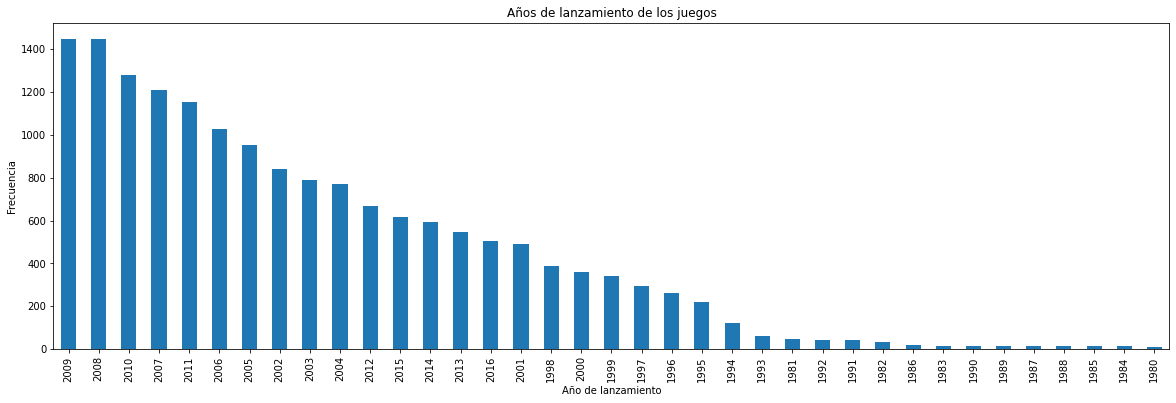

In [44]:
games["year_of_release"].value_counts().plot(kind="bar",figsize=(20,6))
plt.title("Años de lanzamiento de los juegos")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Frecuencia")
plt.show()

De acuerdo a los datos que nos muestran las cantidades de juegos lanzados al año, evidenciamos que los periodos de más lanzamientos de juegos se reportan entre los años del 2007-2010.Los años en los que se reportan menos lanzamientos corresponden al periodo comprendido entre los años 1980-1994. 

Revisamos la variación entre las plataformas de los juegos.

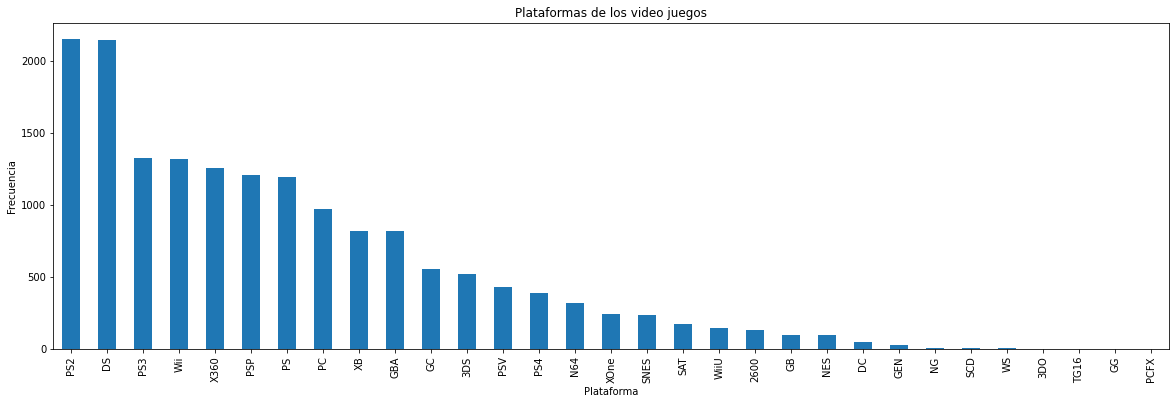

In [45]:
games["platform"].value_counts().plot(kind="bar",figsize=(20,6))
plt.title("Plataformas de los video juegos")
plt.xlabel("Plataforma")
plt.ylabel("Frecuencia")
plt.show()

De acuerdo con el diagrama de barras,evidenciamos que las plataformas mas comunes son: PS2, DS, PS3, Wii y X360.

Ahora revisamos la variación de las ventas según la plataforma.

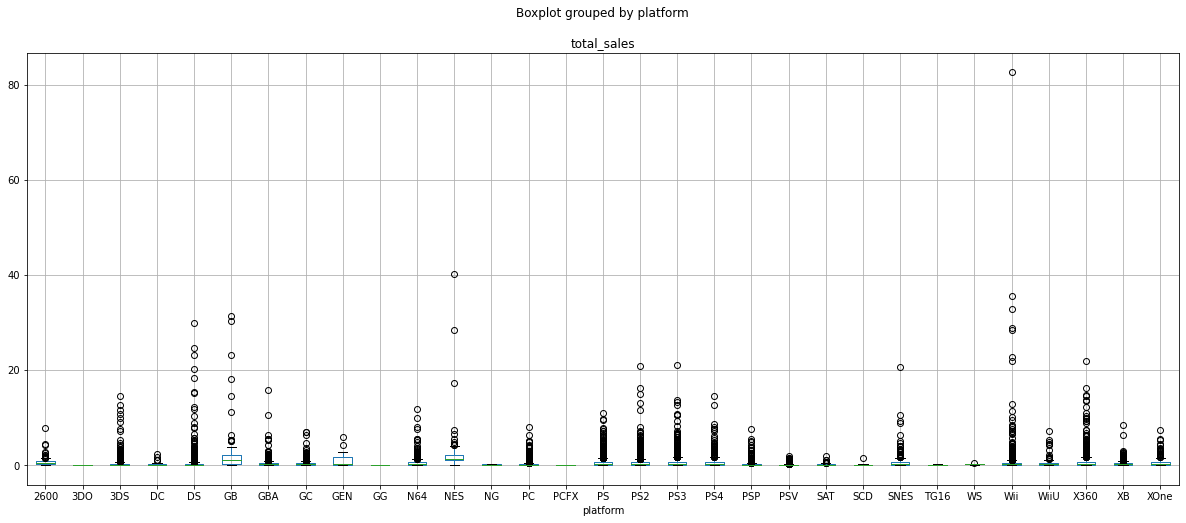

In [46]:
games.boxplot(column="total_sales",by="platform",figsize=(20,8),grid=True)
plt.show()

De acuerdo al diagrama de cajas que nos relaciona las ventas totales según la plataforma, se evidencia que las mayores ventas se reportan en los juegos de las plataformas PS2, X360 y PS3.

Revisamos las distribuciones anuales de los juegos, según la plataforma PS2, X360 y PS3, que son las plataformas en las que se reportan mayores ventas.

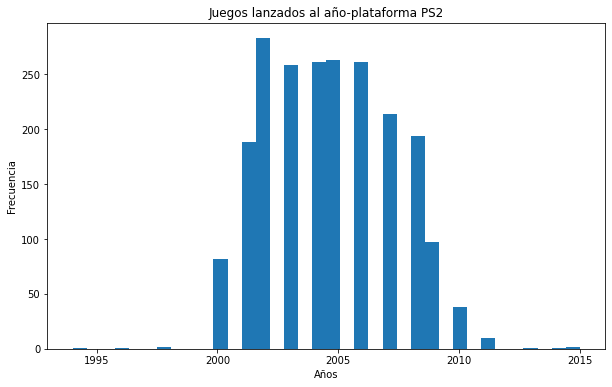

In [47]:
games.query('platform=="PS2"')["year_of_release"].plot(kind="hist",bins=36,figsize=(10,6))
plt.title("Juegos lanzados al año-plataforma PS2")
plt.xlabel("Años")
plt.ylabel("Frecuencia")
plt.show()

De acuerdo al histograma que nos relaciona las cantidades de ventas de los juegos de la plataforma PS2, se reportan mayores cantidades de ventas entre los años 2002-2007.

Utilizamos un gráfico de líneas, para visualizar de mejor manera los años en los que se reportan ventas en la plataforma "PS2".

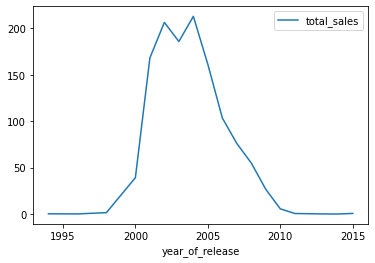

In [48]:
df_ps2=games.query('platform=="PS2"').groupby('year_of_release').sum().reset_index()
df_ps2.plot(x = "year_of_release", y = "total_sales")
plt.show()

Los años en los que se reportan ventas de  juegos de la plataforma "PS2" se encuentran en el periodo del 2000-2010 (10 años en los que se reportan ventas).

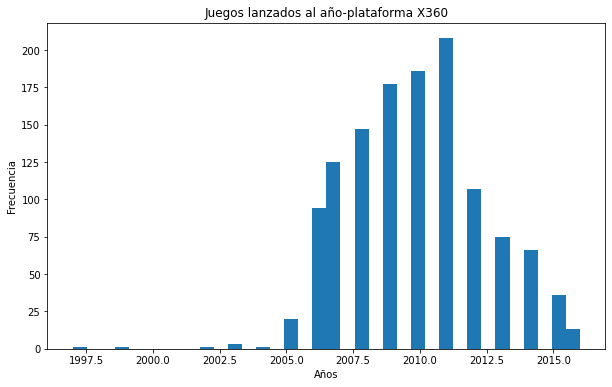

In [49]:
games.query('platform=="X360"')["year_of_release"].plot(kind="hist",bins=36,figsize=(10,6))
plt.title("Juegos lanzados al año-plataforma X360")
plt.xlabel("Años")
plt.ylabel("Frecuencia")
plt.show()

Las mayores cantidades de ventas de los juegos de la plataforma X360, se reportan en los años 2010-2011.

Utilizamos gráfico de líneas para los años en los que se reportan las ventas de los juegos de la plataforma "X360".

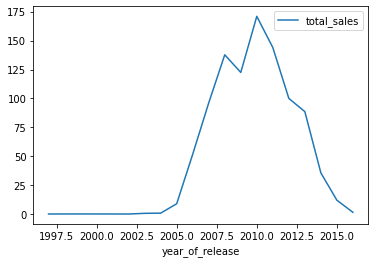

In [50]:
df_360 = games.query('platform=="X360"').groupby('year_of_release').sum().reset_index()
df_360.plot(x = "year_of_release", y = "total_sales")
plt.show()

De acuerdo al gráfico de líneas para las ventas en los juegos de la plataforma "X360", los años en los que se reportan ventas se presentan entre los años 2005-2015 (10 años de ventas para ésta plataforma).

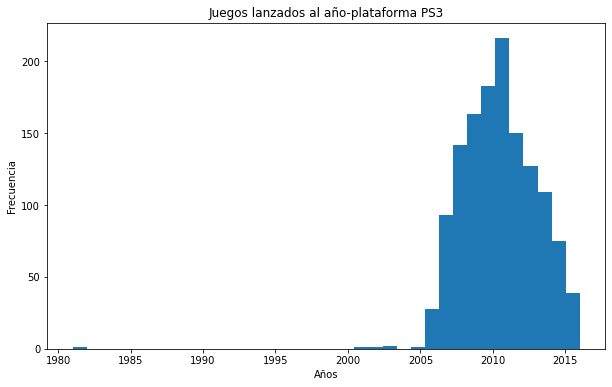

In [51]:
games.query('platform=="PS3"')["year_of_release"].plot(kind="hist",bins=36,figsize=(10,6))
plt.title("Juegos lanzados al año-plataforma PS3")
plt.xlabel("Años")
plt.ylabel("Frecuencia")
plt.show()

Las mayores cantidades de ventas de los juegos de la plataforma PS3, se encuentra entre los años 2009-2011.

Utilizamos un gráfico de líneas para visualizar los años en los que se reportan ventas para los juegos de la plataforma "PS3".

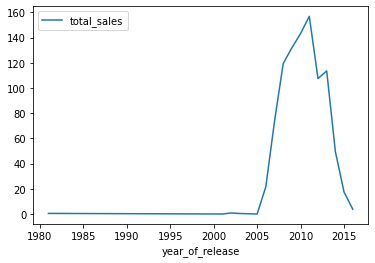

In [52]:
df_ps3=games.query('platform=="PS3"').groupby('year_of_release').sum().reset_index()
df_ps3.plot(x = "year_of_release", y = "total_sales")
plt.show()

De acuerdo al gráfico de líneas que nos muestra la distribución de las ventas para los juegos de la plataforma "PS3"; las ventas para los juegos de ésta plataforma se reportan entre los años 2005-2015 (un periodo de 10 años).

De acuerdo a los histogramas que nos muestran las cantidades de ventas de los juegos según la plataforma, se evidencia que las nuevas plataformas aparecen por lo menos a los 5 años de haber lanzado la plataforma anterior. Las antiguas plataformas tardan en desaparecer por lo menos 10 años.

Para contar sólo con los datos mas relevantes, se decide filtrar la información a partir de las ventas posteriores al año 2011.

In [53]:
rv_games=games.query('year_of_release > 2011')
rv_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [54]:
rv_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2936 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2936 non-null   object 
 1   platform         2936 non-null   object 
 2   year_of_release  2936 non-null   int64  
 3   genre            2936 non-null   object 
 4   na_sales         2936 non-null   float64
 5   eu_sales         2936 non-null   float64
 6   jp_sales         2936 non-null   float64
 7   other_sales      2936 non-null   float64
 8   critic_score     1343 non-null   float64
 9   user_score       1552 non-null   float64
 10  rating           2936 non-null   object 
 11  total_sales      2936 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 298.2+ KB


Se encuentra que los datos ausentes en las columnas critic_score y user_score, se conservan aún filtrando las ventas a partir del año 2011. Se decide, no rellenar éstos datos con datos estadísticos o imputando datos, para prevenir desviar la información teniendo en cuenta la subjetividad del dato (la calificación puede variar según la persona o usuario).

Se revisan las plataformas de juegos mas vendidas para el periodo de los años posteriores al 2011.

In [55]:
rv_games.groupby("platform")["total_sales"].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     291.48
X360    237.69
3DS     195.20
XOne    159.32
WiiU     82.19
PC       64.27
PSV      49.18
Wii      37.94
DS       12.98
PSP      12.60
2600      1.77
PS2       0.93
GC        0.74
XB        0.70
GBA       0.18
Name: total_sales, dtype: float64

Las plataformas que reportan mayores ventas para éste periodo son: PS4, PS3 y X360, respectivamente.

Si se comparan las ventas para éste periodo (ventas a partir del año 2011), se evidencia que las ventas de PS2 disminuyen, lo cual se atribuye a que en su mayoría, las ventas de juegos de éstas plataformas se reporta en años anteriores a los que fueron filtrados.Para el caso de las plataformas X360 y PS3; éstas se conservan como unas de las plataformas mas vendidas, pero para éste caso se reportan mas ventas en los juegos de la plataforma PS3  que en los juegos de la plataforma X360.

Creamos un diagrama de caja para validar las variaciones de las ventas de los juegos según las plataformas.

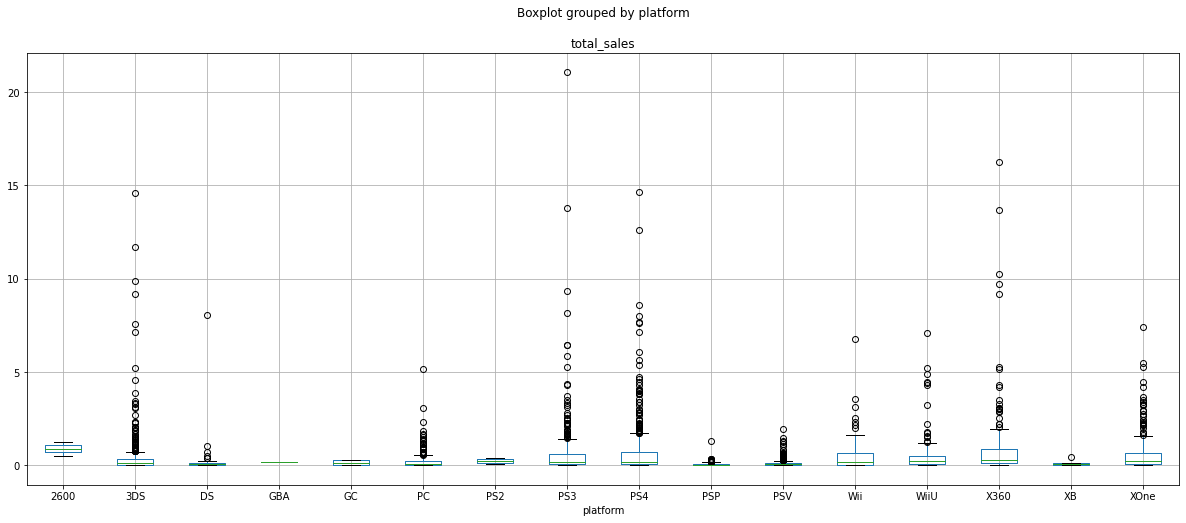

In [56]:
rv_games.boxplot(column="total_sales",by="platform",figsize=(20,8),grid=True)
plt.show()

De acuerdo con el diagrama de cajas, que nos muestra las ventas de los juegos según el tipo de plataforma, se encuentran muy pocas ventas en los juegos de las plataformas GBA,XB,PSP,PSV,PC y GC. En los juegos de las plataformas PS4,X360, PS3 y Xone se evidencian mayores ventas.

Revisamos la relación entre las reseñas de usuarios y profesionales y las ventas en la plataforma PS3.

In [57]:
games_ps3=rv_games.query('platform=="PS3"')
games_ps3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
...,...,...,...,...,...,...,...,...,...,...,...,...
16628,Akatsuki no Goei Trinity,PS3,2012,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16638,Tour de France 2014,PS3,2014,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


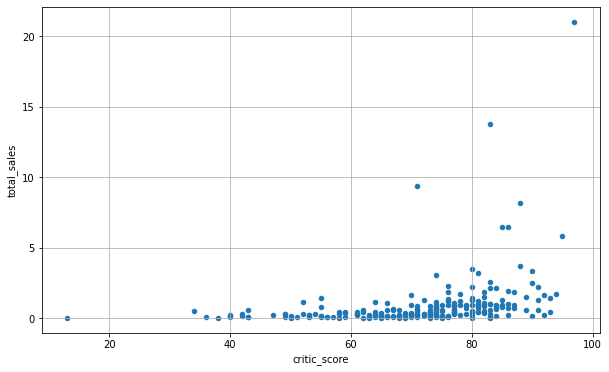

In [58]:
games_ps3.plot(kind="scatter",x="critic_score",y="total_sales",figsize=(10,6),grid=True)
plt.show()

De acuerdo al diagrama de dispersión que nos muestra la variación de las ventas según la calificación por parte de profesionales, se identifica que a mayor calificación mayor valor en ventas.

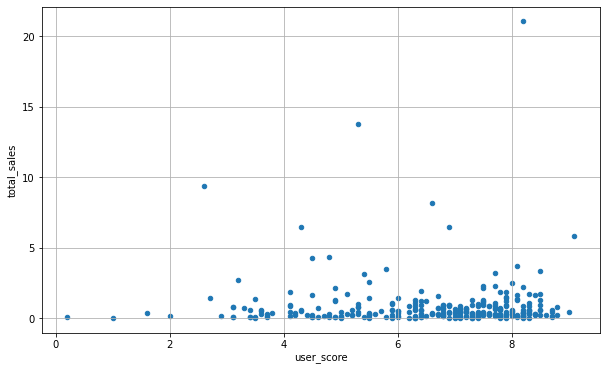

In [59]:
games_ps3.plot(kind="scatter",x="user_score",y="total_sales",figsize=(10,6),grid=True)
plt.show()

En el diagrama de dispersión que nos relaciona los valores en ventas según la calificación por parte del usuario, no se encuentra una relación tan directa del valor total en ventas y la calificación del juego por parte del usuario.

Analizamos la correlación entre las reseñas y las ventas.

In [60]:
sales_score=rv_games[["critic_score","user_score","total_sales"]]
sales_score.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.523659,0.308797
user_score,0.523659,1.000000,0.005248
total_sales,0.308797,0.005248,1.000000


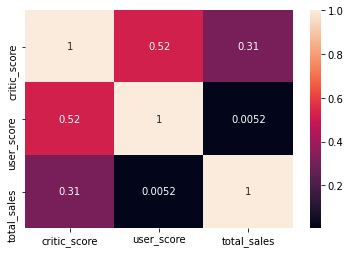

In [61]:
sns.heatmap(sales_score.corr(),annot=True)
plt.show()

La matríz de correlación y el mapa de calor demuestran que las ventas totales de los juegos se encuentran mas relacionadas con las calificaciones o reseñas por parte de los profesionales(0.31).

**Comparamos las ventas de algunos de los juegos, según la plataforma utilizada.**

In [62]:
rv_games.query('name=="Call of Duty: Black Ops 3"').groupby("platform")["total_sales"].sum().sort_values(ascending=False)

platform
PS4     14.63
XOne     7.39
X360     1.70
PS3      1.69
PC       0.26
Name: total_sales, dtype: float64

Para el juego "Call of Duty: Black Ops 3", se identifican mayores ventas en la plataforma PS4, y menores ventas en la plataforma PC.

In [63]:
rv_games.query('name=="Grand Theft Auto V"').groupby("platform")["total_sales"].sum().sort_values(ascending=False)

platform
PS3     21.05
X360    16.27
PS4     12.62
XOne     5.47
PC       1.17
Name: total_sales, dtype: float64

Para el juego 'Grand Theft Auto V', se evidencian mayores ventas en la plataforma PS3, y menores ventas en la plataforma PC.

Analizamos la distribución de los juegos por género, para lo cual utilizamos un diagrama de cajas.

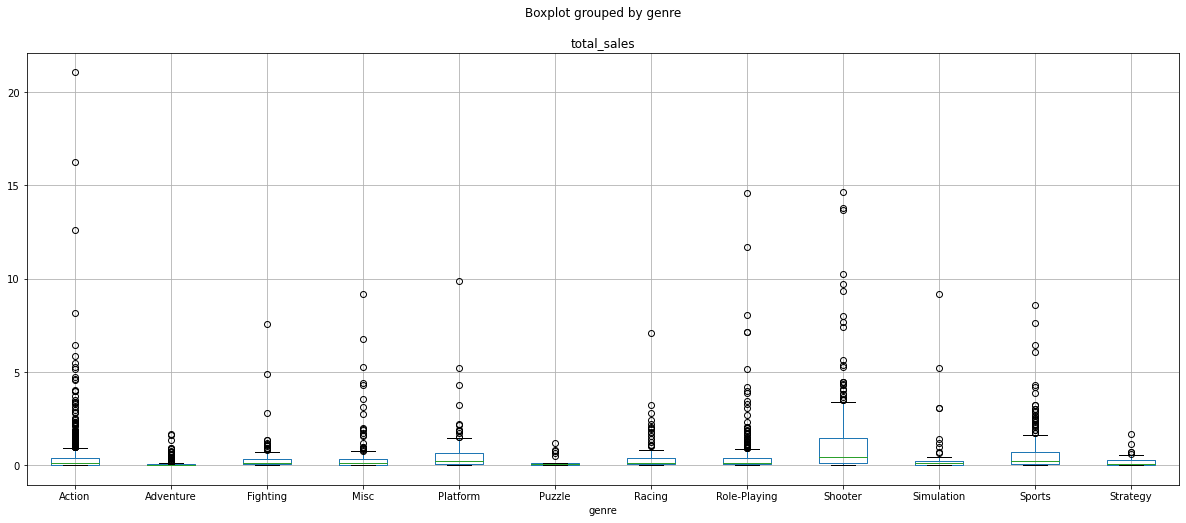

In [64]:
rv_games.boxplot(by="genre",column="total_sales",figsize=(20,8),grid=True)
plt.show()

Se encuentran mayores ventas en los juegos de género Shooter, Sports, Platform y Action. Se identifican menores ventas totales para los juegos del género Adventure, Puzzle y Simulation.

Creamos un perfil de usuario para cada región.

**Región NA (Norteamérica)**

Identificamos las plataformas principales para ésta región.

In [65]:
rv_games.groupby("platform")["na_sales"].sum().sort_values(ascending=False).head()

platform
X360    140.83
PS4     108.74
PS3     104.93
XOne     93.12
3DS      55.67
Name: na_sales, dtype: float64

Las plataformas que generan mas ventas en la región de Norteamérica son: X360, PS4, PS3, XOne y 3DS.

Identificamos los géneros mas comunes para ésta región.

In [66]:
rv_games.groupby("genre")["na_sales"].sum().sort_values(ascending=False).head()

genre
Action          182.26
Shooter         145.98
Sports           82.39
Role-Playing     64.08
Misc             39.92
Name: na_sales, dtype: float64

Los géneros en los cuales se encuentran mayores valores en ventas para la región de Norteamérica son: Action, Shooter, Sports, Role-Playing y Misc.

Identificamos la relación de la clasificación ESRB en las ventas de ésta región.

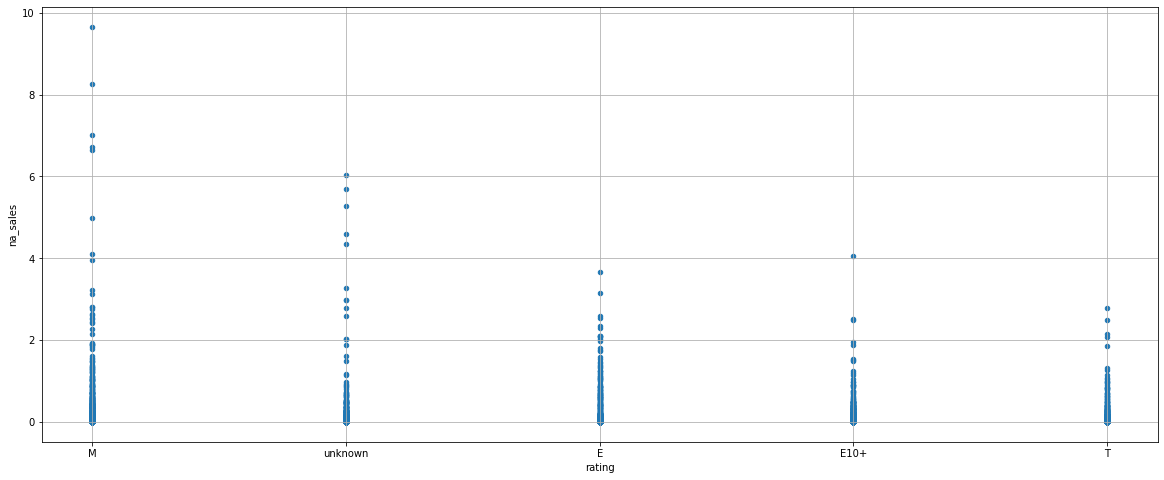

In [67]:
rv_games.plot(kind="scatter",x="rating",y="na_sales",figsize=(20,8),grid=True)
plt.show()

Para la región de Norteamérica, se encuentran mayores valores en ventas en los juegos con clasificaciones M (mayores de 17 años). Se encuentran menore ventas en la clasificación (categoría adolescentes).

**Región EU (Europa)**

Identificamos las plataformas principales para ésta región.

In [68]:
rv_games.groupby("platform")["eu_sales"].sum().sort_values(ascending=False).head()

platform
PS4     141.09
PS3     107.61
X360     74.80
XOne     51.59
3DS      42.83
Name: eu_sales, dtype: float64

Para la región de Europa, se encuentran las mismas plataformas mas comunes que en Norteamérica, sin embargo, se presentan mayores ventas en la plataforma PS4. Las demás plataformas mas comunes para ésta región son PS3, X360, XOne y 3DS.

Identificamos los géneros principales para ésta región.

In [69]:
rv_games.groupby("genre")["eu_sales"].sum().sort_values(ascending=False).head()

genre
Action          161.08
Shooter         114.42
Sports           69.31
Role-Playing     48.59
Racing           27.44
Name: eu_sales, dtype: float64

En el caso de la región Europea, se encuentran mayores ventas en los géneros Action, Shooter, Sports, Role-Playing y Racing.

Identificamos la relación de la clasificación ESRB en las ventas de ésta región.

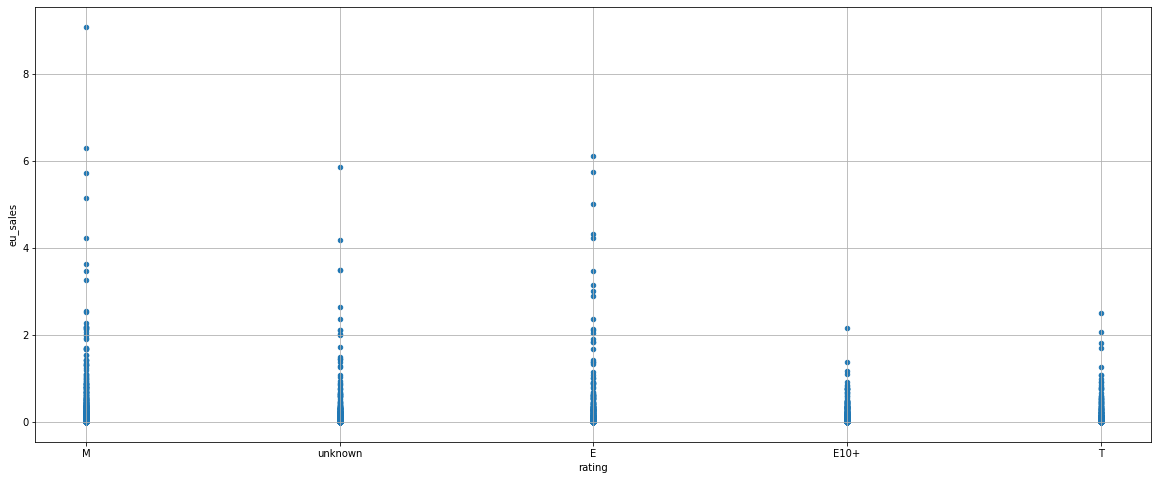

In [70]:
rv_games.plot(kind="scatter",x="rating",y="eu_sales",figsize=(20,8),grid=True)
plt.show()

En la región Europea, se encuentran un poco de mayores ventas en los juegos con clasificación M (mayores de 17 años). En la clasificación en la que se encuentran menores ventas es en E10+(mayores de 10 años).

**Región JP(Japón)**

Identificamos las plataformas mas comunes para ésta región.

In [71]:
rv_games.groupby("platform")["jp_sales"].sum().sort_values(ascending=False).head()

platform
3DS     87.79
PS3     35.30
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

Para la región Japonesa, se encuentran mayores ventas en las plataformas 3DS, PS3, PSV, PS4 y Wiiu respectivamente.

Identificamos los géneros mas comunes en la región Japonesa.

In [72]:
rv_games.groupby("genre")["jp_sales"].sum().sort_values(ascending=False).head()

genre
Role-Playing    65.77
Action          52.80
Misc            12.86
Simulation      10.43
Fighting         9.44
Name: jp_sales, dtype: float64

En la región Japonesa, se encuentran mayores ventas en los géneros Role-Playing, Action, Misc, Simulation y Fighting.

Identificamos la relación de la clasificación ESRB en las ventas de ésta región.

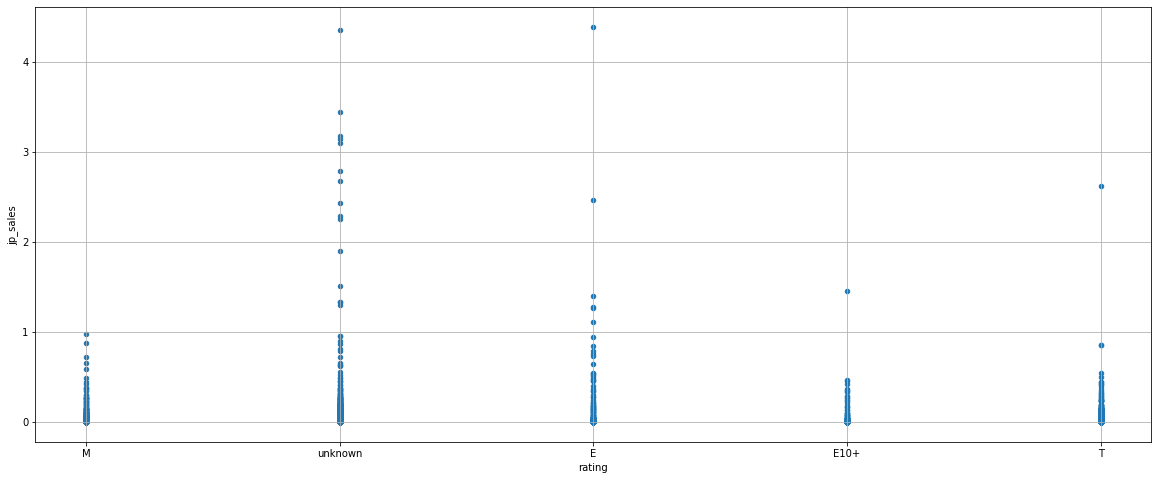

In [73]:
rv_games.plot(kind="scatter",x="rating",y="jp_sales",figsize=(20,8),grid=True)
plt.show()

En la región Japonesa, se encuentran mayores ventas en la clasificación "desconocida" y clasificación E (para todos).

Si analizamos la relación entre la información de todas las regiones, evidenciamos que las plataformas mas comunes en las regiones de Norteamérica y Europa son las mismas. Las plataformas PS3, PS4 y 3DS son comunes en todas las regiones. En el caso de los géneros, se evidencia que los géneros action, shooter, sports y role-playing. Para el caso de la región de Japón, los géneros difieren en comparación con las demás regiones. En cuanto a la clasificación de los juegos, en las regiones de Norteamérica y Europa los mas comunes son los juegos para los usuarios mayores de 17 años. En el caso de Japón, entre las clasificaciones de juegos mas comunes se encuentran los juegos dentro de la clasificación E (para todos).

# Prueba de hipótesis <a id='hypotesis'></a>

**Analizamos si los promedios de calificaciones de los usuarios para las plataformas Xbox One y PC son las mismas.**>

Para comprobar la hipótesis, analizamos la igualdad de las medias de las calificaciones de los usuarios para las platafromas XBox One y PC. Para comparobar la hipótesis utilizamos la prueba T-test, que es la que nos permite comparar los promedios.

**Inicialmente, para comprobar la hipótesis debemos eliminar los valores ausentes que se conservan en la columna "user_score".**

In [74]:
rv_games=rv_games.dropna(subset=["user_score"])

In [75]:
rv_games["user_score"].isna().sum()

0

Para éste caso, (H0) o hipótesis nula considera que no hay diferencias o cambios al comparar las medias para las calificaciones de los usuarios en las plataformas Xone y PC.

La hipótesis alternativa(Ha) considera que la hipótesis nula no se cumple, y en el caso de comparar las medias independientes de las calificaciones de los usuarios para los dos tipos de plataformas, éstas difieren.

Calculamos las calificaciones por parte de los usuarios para las plataformas "Xbox One" y "PC", para comprobar si lo promedios de calificaciones son las mismas o difieren.

In [76]:
calificacion_xone=rv_games[rv_games["platform"]=="XOne"]["user_score"]
calificacion_xone

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [77]:
calificacion_pc=rv_games[rv_games["platform"]=="PC"]["user_score"]
calificacion_pc

192      4.0
458      3.9
688      7.9
959      4.8
1095     7.9
        ... 
16463    6.8
16509    7.9
16518    1.4
16584    7.9
16692    7.6
Name: user_score, Length: 207, dtype: float64

In [78]:
alpha=0.5 # Determinamos el nivel de significancia.

In [79]:
results=st.ttest_ind(calificacion_xone,calificacion_pc)

print('p-value:',results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.5277733028055758
No rechazamos la hipótesis nula


De acuerdo con la prueba T-test que utilizamos para comprobar la prueba de hipótesis, no se rechaza entonces la hipótesis nula debido a que el valor de p se encuentra muy cerca del valor de significancia; por lo cual, podemos concluir que los promedios de de calificaciones para las plataformas Xone y PC no difieren.

**Analizamos si los promedios de calificaciones de los usuarios para los géneros de Acción y Deportes difieren.**

Para éste caso, también utilizamos entonces la prueba T-test.

Para éste caso, (H0) o hipótesis nula considera que no hay diferencias o cambios al comparar las medias para las calificaciones en los géneros acción y deportes.

La hipótesis alternativa(Ha) considera que la hipótesis nula no se cumple, y en el caso de comparar las medias independientes de las calificaciones de los usuarios para los dos tipos de géneros, éstas difieren.

In [80]:
calificacion_accion=rv_games[rv_games["genre"]=="Action"]["user_score"]
calificacion_accion

16       8.2
23       8.1
42       8.3
81       6.6
127      6.9
        ... 
16597    6.0
16652    8.5
16654    5.1
16660    6.7
16692    7.6
Name: user_score, Length: 531, dtype: float64

In [81]:
calificacion_sport=rv_games[rv_games["genre"]=="Sports"]["user_score"]
calificacion_sport

77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16146    6.9
16230    5.5
16450    4.5
16518    1.4
16643    6.6
Name: user_score, Length: 196, dtype: float64

In [82]:
alpha=0.5 #Determinamos el valor de significancia.

In [83]:
results=st.ttest_ind(calificacion_accion,calificacion_sport)

print('p-value:',results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 9.547863904411721e-26
Rechazamos la hipótesis nula


De acuerdo a la prueba T-test utilizada para comprobar la prueba de hipótesis, en éste caso se rechaza la hipótesis nula, teniendo en cuenta el bajo valor de p comparado con el valor de significancia; por lo cual podemos concluir que los promedios de calificación de los usuarios para los juegos con géneros Acción y Deportes difieren.

# Conclusiones <a id='end'></a>

Al cargar los datos, se identificaron valores ausentes.Las columnas en las que se encuentran mas datos ausentes son en las columnas "critic_score"(51%), "rating"(40%) y "user_score" (40%). En la columna "year_of_release" se encuentra un 1% de datos ausentes y en las columnas "name" y "genre" sólo 0.012% de datos ausentes.

Para facilitar la manipulación de la información, los nombres de las columnas se reemplazan a minúsculas.

Para rellenar los datos ausentes de la columna "rating", se establece la categorización de "unknown", debido a la complejidad de saber con exactitud la clasificación del juego.

Al filtrar las filas en las que user_score es igual a "tbd", se dicide reemplazar éstos valores por "NaN", ya que éste valor se atribuye a los juegos que no cuentan con calificación user_score.

Para completar la información ausente en la columna "year_of_release", se importa una base de datos externa que contenga también información de ventas de video juegos. La información del dataframe inicial y la base de datos externa se unen con la herramienta merge. Los datos ue continúan ausentes luego de ésta unión se eliminan debido al poco porcentaje de éstos datos.

Para los datos faltantes de la columna "name" y "genre", se eliminaron las filas en las que se encontraban los datos ausentes, teniendo en cuenta el bajo porcentajes que representaban éstos datos.

Los tipos de datos en las columnas "year_of_release" se cambian a tipo entero. El tipo de datos en la columna "user_score" se cambia de tipo object a tipo float.

De acuerdo a los datos que nos muestran las cantidades de juegos lanzados al año, evidenciamos que los periodos de más lanzamientos de juegos se reportan entre los años del 2006-2011. Los años en los que más se reportan lanzamientos de juegos son el 2009 y 2008. Los años en los que se reportan menos lanzamientos corresponden a los años 80's.

Al revisar las ventas totales según la plataforma, evidenciamos que las mayores ventas se reportan en los juegos de las plataformas PS2, X360 y PS3 (para todos los años de la base de datos).

De acuerdo con las distribuciones anuales de los juegos de las plataformas en las que se encontraron mayores ventas (PS2,X360 y PS3), las mayores cantidades de ventas de los juegos de la plataforma PS3, se encuentra entre los años 2009-2011. Los juegos de la plataforma PS2 reportaron ventas por lo menos hasta el 2011, mientras que las plataformas X360 y PS3 reportan ventas hasta el año 2016. De acuerdo a los histogramas que nos muestran las cantidades de ventas de los juegos según la plataforma, se evidencia que las nuevas plataformas aparecen por lo menos a los 5 años de haber lanzado la plataforma anterior. Las antiguas plataformas tardan en desaparecer por lo menos 10 años.

Para contar sólo con los datos mas relevantes, se decide filtrar la información a partir de las ventas posteriores al año 2011.

Los datos ausentes en las columnas critic_score y user_score, se conservan aún filtrando las ventas a partir del año 2011. Se decide, no rellenar éstos datos con datos estadísticos o imputando datos, para prevenir desviar la información teniendo en cuenta la subjetividad del dato (la calificación puede variar según la persona o usuario).

Se revisan nuevamente las plataformas de juegos mas vendidas, pero para el periodo de los años posteriores al 2011, en lo cual se encuentra que las plataformas con mayores ventas para éste periodo son: PS4, PS3 y X360, respectivamente. Si se comparan las ventas para éste periodo (ventas a partir del año 2011), se evidencia que las ventas de PS2 disminuyen, lo cual se atribuye a que en su mayoría, las ventas de juegos de éstas plataformas se reporta en años anteriores a los que fueron filtrados.Para el caso de las plataformas X360 y PS3; éstas se conservan como unas de las plataformas mas vendidas, pero para éste caso se reportan mas ventas en los juegos de la plataforma PS3 que en los juegos de la plataforma X360.

De acuerdo con el diagrama de cajas, que nos muestra las ventas de los juegos según el tipo de plataforma, se encuentran muy pocas ventas en los juegos de las plataformas GBA,XB,PSP,PSV,PC y GC. En los juegos de las plataformas PS4,X360, PS3 y Xone se evidencian mayores ventas.

De acuerdo al diagrama de dispersión que nos muestra la variación de las ventas según la calificación por parte de profesionales, se identifica que a mayor calificación mayor valor en ventas.

En el diagrama de dispersión que nos relaciona los valores en ventas según la calificación por parte del usuario, no se encuentra una relación tan directa del valor total en ventas y la calificación del juego por parte del usuario.

La matríz de correlación y el mapa de calor demuestran que las ventas totales de los juegos se encuentran mas relacionadas con las calificaciones o reseñas por parte de los profesionales(0.31).

Al comparar las ventas de algunos juegos, según la plataforma utilizada, encontramos que por ejemplo para el caso del juego "Call of Duty: Black Ops 3" se identifican mayores ventas en la plataforma PS4, y menores ventas en la plataforma PC. Para el caso del juego "Grand Theft Auto V" se evidencian mayores ventas en la plataforma PS3, y menores ventas en la plataforma PC.

De acuerdo al diagrama de cajas, que nos relaciona las ventas según el género del juego, se encuentran mayores ventas en los juegos de género Shooter, Sports, Platform y Action. Se identifican menores ventas totales para los juegos del género Adventure, Puzzle y Simulation.

Al identificar las plataformas principales para cada región, se evidencia que las plataformas que generan mas ventas en la región de Norteamérica son: X360, PS4, PS3, XOne y 3DS. Para la región de Europa, se encuentran las mismas plataformas mas comunes que en Norteamérica, sin embargo, se presentan mayores ventas en la plataforma PS4. Las demás plataformas mas comunes para ésta región son PS3, X360, XOne y 3DS. Para la región Japonesa, se encuentran mayores ventas en las plataformas 3DS, PS3, PSV, PS4 y Wiiu respectivamente.

En el caso de los géneros que generan mas ventas para cada región se evidencia que los géneros en los cuales se encuentran mayores valores en ventas para la región de Norteamérica son: Action, Shooter, Sports, Role-Playing y Misc. En el caso de la región Europea, se encuentran mayores ventas en los géneros Action, Shooter, Sports, Role-Playing y Racing. En la región Japonesa, se encuentran mayores ventas en los géneros Role-Playing, Action, Misc, Simulation y Fighting.

De acuerdo a los diagramas de dispersión que nos muestran las relaciones de la clasificación ESRB en las ventas de cada región, encontramos que para la región de Norteamérica, se encuentran mayores valores en ventas en los juegos con clasificaciones M (mayores de 17 años). Se encuentran menores ventas en la clasificación (categoría adolescentes). En la región Europea, se encuentran un poco de mayores ventas en los juegos con clasificación M (mayores de 17 años). En la clasificación en la que se encuentran menores ventas es en E10+(mayores de 10 años). En la región Japonesa, se encuentran mayores ventas en la clasificación "desconocida" y clasificación E (para todos).

Para analizar si los promedios de calificaciones de los usuarios para las platafromas Xbox One y PC son las mismas, utilizamos la prueba T-test, según la cual no se rechaza entonces la hipótesis nula debido a que el valor de p se encuentra muy cerca del valor de significancia 0.5); por lo cual, podemos concluir que los promedios  de calificaciones para las plataformas Xone y PC no difieren. Para al analizar si los promedios de calificaciones de los usuarios para los géneros de Acción y deportes difieren, utilizamos también la prueba T-test, según la cual se rechaza la hipótesis nula, teniendo en cuenta el bajo valor de p comparado con el valor de significancia; por lo cual podemos concluir que los promedios de calificación de los usuarios para los juegos con géneros Acción y deportes difieren.

De acuerdo al proceso del análisis de los datos, se identifica que algunos de los patrones que determinan si un juego tiene éxito en ventas son: la crítica por parte de los profesionales, la plataforma utilizada del juego y el género del juego, siendo Action, Shooter y Sports los géneros que generaron mas ventas para las regiones de Norteamérica y Europa, y role-playing, action y misc algunos de los géneros que generan mas ventas para la región de Japón.